In [5]:
import numpy as np

# Extracting Data from H5 Files

In [22]:
import h5py
with h5py.File('/data/users/kyle/Mishas_Data/M83_stokes_h5/orig_flag.h5', 'r') as f:
    y  = f['.']['labels'].value

with h5py.File('/data/users/kyle/Mishas_Data/M83_stokes_h5/4mag.h5', 'r') as f:
    x  = f['.']['features'].value

# Flattening and Concatenating Matrices


In [9]:
x = x.transpose(2,0,1).reshape(-1,x.shape[1])
y = y.flatten(order='F')

In [25]:
x.shape

(1100000, 4, 21)

# GMM on a single baseline for testing purposes

In [26]:
from sklearn.mixture import GaussianMixture
import pickle
gmm = GaussianMixture(n_components=3, verbose=1,covariance_type = 'spherical',verbose_interval=1)
gmm.fit(x[:,:,20])
labels_all = np.invert(gmm.predict(x[:,:,20])==0)

Initialization 0
  Iteration 0
  Iteration 1
  Iteration 2
  Iteration 3
  Iteration 4
  Iteration 5
  Iteration 6
  Iteration 7
  Iteration 8
  Iteration 9
  Iteration 10
  Iteration 11
Initialization converged: True


# GMM on multiple baselines 

In [134]:
from sklearn.mixture import GaussianMixture
import pickle
gmm = GaussianMixture(n_components=3, verbose=1,covariance_type = 'spherical',verbose_interval=1)
labels = np.empty(shape=(x.shape[0],21))
for i in range(21):
    gmm.fit(x[:,:,i])
    labels[:,i] = np.invert(gmm.predict(x[:,:,i])==0)


Initialization 0
  Iteration 0
  Iteration 1
  Iteration 2
  Iteration 3
  Iteration 4
  Iteration 5
  Iteration 6
  Iteration 7
  Iteration 8
  Iteration 9
  Iteration 10
  Iteration 11
  Iteration 12
  Iteration 13
  Iteration 14
  Iteration 15
  Iteration 16
  Iteration 17
Initialization converged: True
Initialization 0
  Iteration 0
  Iteration 1
  Iteration 2
  Iteration 3
  Iteration 4
  Iteration 5
  Iteration 6
  Iteration 7
  Iteration 8
  Iteration 9
  Iteration 10
  Iteration 11
  Iteration 12
  Iteration 13
  Iteration 14
  Iteration 15
Initialization converged: True
Initialization 0
  Iteration 0
  Iteration 1
  Iteration 2
  Iteration 3
  Iteration 4
  Iteration 5
  Iteration 6
  Iteration 7
  Iteration 8
Initialization converged: True
Initialization 0
  Iteration 0
  Iteration 1
  Iteration 2
  Iteration 3
  Iteration 4
  Iteration 5
  Iteration 6
  Iteration 7
  Iteration 8
  Iteration 9
  Iteration 10
  Iteration 11
  Iteration 12
  Iteration 13
  Iteration 14
  Iterat

# Flattening resulting class predictions and original flags

In [135]:
y_flat = y.flatten(order='F')
y_pred_flat = labels.flatten(order='F')

# Producing a pretty confusion matrix

In [27]:
from sklearn.metrics import confusion_matrix
cfn_mx =  confusion_matrix(y[:,20], labels_all)
cm = cfn_mx.astype('float') / cfn_mx.sum(axis=1)[:, np.newaxis]


Normalized confusion matrix
[[1.   0.  ]
 [0.22 0.78]]


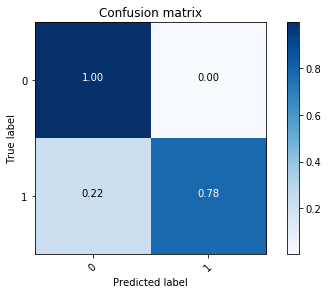

In [29]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

import numpy as np
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
    

class_names = [0,1]

# Compute confusion matrix
# cnf_matrix = confusion_matrix(y_test, y_predict)




np.set_printoptions(precision=2)


plt.figure()
plot_confusion_matrix(cfn_mx, classes=class_names,normalize=True,
                      title='Confusion matrix')

plt.savefig('/users/kyle/images/Confusion_GMM_20.png', bbox_inches='tight')


# Producing 3 image plots at a given index from flattened data

In [20]:
indx = 20

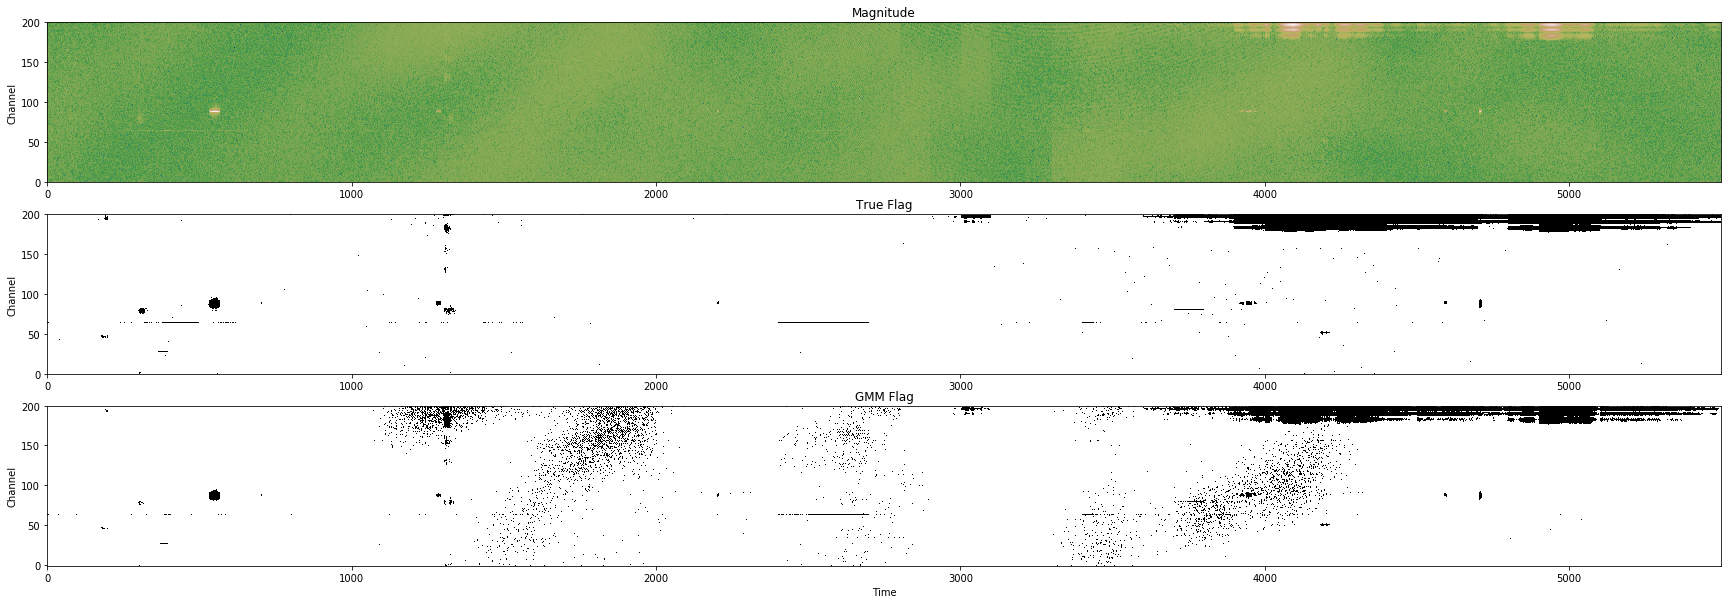

In [21]:
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
fig = plt.figure(figsize=(30, 10))
ax1 = fig.add_subplot(311)
im1 = ax1.imshow(np.transpose(x[0+1100000*indx:1100000+1100000*indx,0].reshape(5500, 200)), aspect="auto", cmap="gist_earth"
                , norm=matplotlib.colors.LogNorm()
                )
ax1.set_ylabel("Channel")
ax1.set_title("Magnitude")

plt.gca().invert_yaxis()

ax2 = fig.add_subplot(312)
im2 = ax2.imshow(np.transpose(y[0+1100000*indx:1100000+1100000*indx].reshape(5500, 200)), aspect="auto", cmap="Greys"
                # , norm=matplotlib.colors.LogNorm()
                )
ax2.set_title("True Flag")
ax2.set_ylabel("Channel")
plt.gca().invert_yaxis()

ax3 = fig.add_subplot(313)
im3 = ax3.imshow(np.transpose(labels_all[0+1100000*indx:1100000+1100000*indx].reshape(5500, 200)), aspect="auto", cmap="Greys"
                # , norm=matplotlib.colors.LogNorm()
                )
ax3.set_title("GMM Flag")
ax3.set_xlabel("Time")
ax3.set_ylabel("Channel")

plt.gca().invert_yaxis()
plt.show()



In [211]:
# fig.savefig('/users/kyle/images/GMM_Flag_0_4MAG_ALLCONCAT.png', bbox_inches='tight')


In [176]:
from sklearn.metrics import precision_recall_fscore_support
cm_arr = np.empty(shape=(2,21))
metric_arr = np.empty(shape=(3,21))
for i in range(21):
    cfn_mx =  confusion_matrix(y[:,i], labels[:,i])
    cm = cfn_mx.astype('float') / cfn_mx.sum(axis=1)[:, np.newaxis]
    
    metrics = precision_recall_fscore_support(y[:,i], labels[:,i], average='binary')
    
    cm_arr[0,i] = cm[0,0]
    cm_arr[1,i] = cm[1,1]
    metric_arr[0,i] = metrics[0]
    metric_arr[1,i] = metrics[1]
    metric_arr[2,i] = metrics[2]


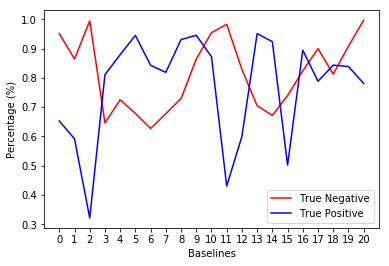

<Figure size 432x288 with 0 Axes>

In [188]:
plt.plot(np.arange(21),cm_arr[0,:],c='red',label='True Negative')
plt.plot(np.arange(21),cm_arr[1,:],c='blue',label='True Positive')
plt.legend()
plt.xticks(np.arange(21))
plt.xlabel('Baselines')
plt.ylabel('Percentage (%)')
plt.show()
plt.savefig('/users/kyle/images/cm_4mag.png', bbox_inches='tight')


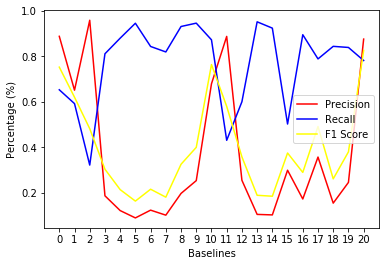

<Figure size 432x288 with 0 Axes>

In [189]:
plt.plot(np.arange(21),metric_arr[0,:],c='red',label='Precision')
plt.plot(np.arange(21),metric_arr[1,:],c='blue',label='Recall')
plt.plot(np.arange(21),metric_arr[2,:],c='yellow',label='F1 Score')

plt.legend()
plt.xticks(np.arange(21))
plt.xlabel('Baselines')
plt.ylabel('Percentage (%)')
plt.show()
plt.savefig('/users/kyle/images/metrics_4mag.png', bbox_inches='tight')
